##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S5: Liga de Fútbol Profesional

## Objetivos

El objetivo de este challenge es simular mediante el método de montecarlo el resultado de la próxima liga 2019-2020.

Para ello, utilizando las distribuciones de probabilidad, y todos los conceptos previos que hemos aprendido realizaremos una simulación lo más realista posible.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime


## Carga de datos

Para este challenge dispones de varias fuentes de datos que puedes utilizar:

* `equipos_liga_2019-20.txt` Fichero TXT con los equipos que disputarán la temporada 2019 - 2020 en la primera división de Liga de Fútbol profesional en España.
* `clasificacion_historica.csv` Fichero con resultados acumulados de todos los equipos que han jugado alguna vez en primera division.
* Cualquier otra fuente de datos que quieras añadir o información tuya si sabes mucho de fútbol 😄.

El primer paso será la carga de datos a partir del fichero `TXT`. Como sólo contiene el nombre de los equipos meteremos los valores en una lista.

In [2]:
with open('equipos_liga_2019-20.txt', encoding='utf-8') as f:
    equipos = f.readlines()
    equipos = [x.strip() for x in equipos] 

equipos

['D. Alavés',
 'Athletic Club',
 'Atlético de Madrid',
 'FC Barcelona',
 'Real Betis',
 'RC Celta',
 'SD Eibar',
 'RCD Espanyol',
 'Getafe CF',
 'Granada CF',
 'CD Leganés',
 'Levante UD',
 'RCD Mallorca',
 'C.A. Osasuna',
 'Real Madrid',
 'Real Sociedad',
 'R. Valladolid CF',
 'Sevilla FC',
 'Valencia CF',
 'Villarreal CF']

## Simulador de partidos

El primer paso para realizar un análisis de montecarlo es definir la función que nos permita simular cada caso individual, en nuestro casos son los partidos. Puedes implementar esta función como quieras.

Tip: puedes usar `clasificacion_historica.csv` que contiene datos históricos de los distintos equipos, usar una fuente que busques por internet, o puedes hacer una función con tu "conocimiento futbolístico".

In [3]:
clashist=pd.read_csv("clasificacion_historica.csv",sep='\t')

In [4]:
clashist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pos       63 non-null     object
 1   Equipo    63 non-null     object
 2   Ptos      63 non-null     int64 
 3   PJ        63 non-null     int64 
 4   PG        63 non-null     int64 
 5   PE        63 non-null     int64 
 6   PP        63 non-null     int64 
 7   GFavor    63 non-null     int64 
 8   GContra   63 non-null     int64 
 9   DifGoles  63 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 5.0+ KB


Podemos ver los datos de clasificación histórica de los equipos que jugarán la liga la próxima temporada

In [5]:
clashist[clashist.Equipo.isin(equipos)]


,Pos,Equipo,Ptos,PJ,PG,PE,PP,GFavor,GContra,DifGoles
0,1º,Real Madrid,4529,2838,1690,567,581,6104,3230,2874
1,2º,FC Barcelona,4442,2838,1635,578,625,6089,3179,2910
2,3º,Atlético de Madrid,3597,2690,1286,618,786,4647,3360,1287
3,4º,Valencia CF,3520,2740,1224,639,877,4514,3542,972
4,5º,Athletic Club,3464,2838,1232,660,946,4713,3794,919
5,6º,Sevilla FC,2936,2484,1024,546,914,3791,3478,313
6,7º,RCD Espanyol,2894,2702,974,632,1096,3693,3976,-283
7,8º,Real Sociedad,2672,2378,891,595,892,3339,3335,4
9,10º,Real Betis,1995,1804,638,454,712,2266,2604,-338
10,11º,RC Celta,1879,1774,609,410,755,2390,2747,-357


Lo primero es simular un partido entre 2 equipos

In [6]:
DEBUG=False

In [7]:
def print_log (value1,value2=None):
    if (DEBUG):
        if(value2):
            print(value1,value2)
        else:
            print(value1)
    return


In [8]:
def simular_partido(equipo_local, equipo_visitante):
    '''Simula un partido, devuelve una entero: 0 gana el equipo local, 1 empate, 2 gana el equipo visitante'''
    resultado = 1
    # AQUI TU CODIGO
    # Por ser local le asociamos ya un punto + condiones aleatorias como lesiones de ultima hora, desacierto de su estrella ...
    puntos_equipo_local = 1 + np.random.randint(0,2)  
    
    # Condiones aleatorias como lesiones de ultima hora, desacierto de su estrella ...
    puntos_equipo_visitante = 0 + np.random.randint(0,2)  

    equipo_local = clashist[clashist['Equipo'] == equipo_local]
    equipo_visitante = clashist[clashist['Equipo'] == equipo_visitante]

    print_log(equipo_local)
    print_log(equipo_visitante)
    print_log(' \n')

    # Evaluamos por coeficiente de puntos.

    coef_pt_equipo_local = int(equipo_local.Ptos)/int(equipo_local.PJ)
    coef_pt_equipo_visitante = int(
        equipo_visitante.Ptos)/int(equipo_visitante.PJ)

    print_log('coef_pt_equipo_local :', coef_pt_equipo_local)
    print_log('coef_pt_equipo_visitante :', coef_pt_equipo_visitante)

    # Por ser local, aunque tenga un coeficente de puntos un 0,10 por debajo del visitante le damos la victoria.
    # 
    if(coef_pt_equipo_local - coef_pt_equipo_visitante > -0.10):
        puntos_equipo_local += 1

    else:
        puntos_equipo_visitante += 1

    print_log('Validacion 1')
    print_log(' puntos_equipo_local:', puntos_equipo_local)
    print_log(' puntos_equipo_visitante:', puntos_equipo_visitante)
    print_log(' \n')

    # Evaluamos por coeficiente de goles.

    coef_gf_equipo_local = int(equipo_local.GFavor)/int(equipo_local.PJ)
    coef_gf_equipo_visitante = int(
        equipo_visitante.GFavor)/int(equipo_visitante.PJ)

    print_log('coef_gf_equipo_local :', coef_gf_equipo_local)
    print_log('coef_gf_equipo_visitante :', coef_gf_equipo_visitante)

    # Por ser local le damos margen por debajo 0,25 goles por debajo del visitante. 
    # Beneficiamos un equipo menos goleador que juega en casa.
    if(coef_gf_equipo_local - coef_gf_equipo_visitante > -0.25):

        puntos_equipo_local += 1
    else:
        puntos_equipo_visitante += 1

    print_log('Validacion 2')
    print_log(' puntos_equipo_local:', puntos_equipo_local)
    print_log(' puntos_equipo_visitante: ', puntos_equipo_visitante)
    print_log(' \n')

    # Evaluamos por coeficientes de partidos ganados

    coef_pg_equipo_local = int(equipo_local.PG)/int(equipo_local.PJ)
    coef_pg_equipo_visitante = int(
        equipo_visitante.PG)/int(equipo_visitante.PJ)

    print_log('coef_pg_equipo_local :', coef_pg_equipo_local)
    print_log('coef_pg_equipo_visitante :', coef_pg_equipo_visitante)

    # Por ser local le damos más margen de hasta una decima por debajo del visitante.
    
    if((coef_pg_equipo_local - coef_pg_equipo_visitante) > -0.10):
        puntos_equipo_local += 1
    else:
        puntos_equipo_visitante += 1

    print_log('Validacion 3')
    print_log(' puntos_equipo_local:', puntos_equipo_local)
    print_log(' puntos_equipo_visitante: ', puntos_equipo_visitante)
    print_log(' \n')

    # Evaluamos los calculos y determinamos si es una victoria local, es un empate o es una victoria domicilio

    print_log('puntos_equipo_local ', puntos_equipo_local)
    print_log('puntos_equipo_visitante ', puntos_equipo_visitante)
    
    if (puntos_equipo_local > puntos_equipo_visitante):
        resultado = 0
    elif(puntos_equipo_local < puntos_equipo_visitante):
        resultado = 2
    else:
        resultado = 1

    return resultado

In [9]:
simular_partido('Real Madrid', 'FC Barcelona')

0

## Simulador de temporadas

Una vez que tenemos una función que nos simula un partido, vamos a hacer una función que nos simule una temporada completa `simular_temporada`:

In [10]:
def simular_temporada():
    '''Simula una temporada completa, y devuelve un diccionario con el resultado en puntos obtenido por cada equipo'''
    
    # Creo una clasificación vacía (diccionario con puntos)
    clasificacion = {}
    for e in equipos:
        clasificacion[e] = 0 

    for equipo_local in equipos:
        for equipo_visitante in equipos:
            if equipo_local == equipo_visitante:
                pass
            resultado = simular_partido(equipo_local, equipo_visitante)
            
            if resultado == 0: 
                # Gana el equipo local
                clasificacion[equipo_local] += 3
            elif resultado == 1: 
                # Empate
                clasificacion[equipo_local] += 1
                clasificacion[equipo_visitante] += 1
            elif resultado == 2:
                # Gana el equipo visitante
                clasificacion[equipo_visitante] += 3
                
    return clasificacion

## Agregador de resultados
Por último necesitamos una función (`simular_lfp`) que nos genere los distintos casos de prueba a evaluar (temporadas) y por cada una de ella nos agrege los resultados

In [11]:
def simular_lfp(num_iteraciones):
    '''
    Realiza la simulación de montecarlo
    Devuelve un dataframe que tiene por columnas los distintos equipos y por cada fila la posición
    de cada equipo en la simulación.
    '''
    # Creo una clasificación global vacía
    clasificacion_global = pd.DataFrame(columns=equipos)

    num_intentos = 0
    for intento in range(0, num_iteraciones):
        if intento % 5 == 0:
            print("Simulando temporada " + str(intento) + "...")

        # Obtenemos los resultados de puntos de la temporada
        temporada_i = simular_temporada()     
        #print("Resultados: " + str(temporada_i))

        # Convertimos los puntos en clasificacion
        clasificacion = {}
        posicion = 1
        for equipo in sorted(temporada_i, key=temporada_i.get, reverse=True):
            clasificacion[equipo] = posicion
            posicion += 1

        #print("Clasificación: " + str(clasificacion))

        # Obtengo el equipo ganador
        clasificacion_global.loc[intento] = clasificacion

        num_intentos += 1

    #print(clasificacion_global)
    print("Fin de la simulación.")
    return clasificacion_global

## Ejecución del análisis

In [12]:
clasificacion_global = simular_lfp(110)

Simulando temporada 0...
Simulando temporada 5...
Simulando temporada 10...
Simulando temporada 15...
Simulando temporada 20...
Simulando temporada 25...
Simulando temporada 30...
Simulando temporada 35...
Simulando temporada 40...
Simulando temporada 45...
Simulando temporada 50...
Simulando temporada 55...
Simulando temporada 60...
Simulando temporada 65...
Simulando temporada 70...
Simulando temporada 75...
Simulando temporada 80...
Simulando temporada 85...
Simulando temporada 90...
Simulando temporada 95...
Simulando temporada 100...
Simulando temporada 105...
Fin de la simulación.


In [13]:
clasificacion_global.tail(10)

,D. Alavés,Athletic Club,Atlético de Madrid,FC Barcelona,Real Betis,RC Celta,SD Eibar,RCD Espanyol,Getafe CF,Granada CF,CD Leganés,Levante UD,RCD Mallorca,C.A. Osasuna,Real Madrid,Real Sociedad,R. Valladolid CF,Sevilla FC,Valencia CF,Villarreal CF
100,11,5,3,2,10,15,12,13,8,19,20,18,14,16,1,9,17,6,4,7
101,10,5,3,2,13,15,11,9,14,19,20,18,12,17,1,8,16,6,4,7
102,11,5,3,2,14,12,10,15,8,18,20,19,13,16,1,9,17,6,4,7
103,12,5,3,2,11,15,9,13,10,19,20,18,14,16,1,8,17,6,4,7
104,11,5,3,2,13,14,10,15,9,19,20,18,12,17,1,8,16,7,4,6
105,10,5,3,2,11,12,9,14,15,18,20,19,13,17,1,8,16,6,4,7
106,10,5,3,2,13,14,12,9,15,19,20,18,11,17,1,8,16,6,4,7
107,11,5,3,1,14,12,15,9,10,19,20,18,13,17,2,8,16,6,4,7
108,11,5,3,2,15,12,10,9,13,20,19,18,14,16,1,8,17,6,4,7
109,11,5,3,2,10,15,12,13,8,19,20,18,14,16,1,9,17,7,4,6


## Análisis de resultados

Ahora, con los resultados obtenidos, vamos a plantearnos algunas preguntas:

### ¿Cuál es la posición media de cada equipo en la simulación?

In [14]:
clasificacion_global.mean()

D. Alavés             10.890909
Athletic Club          5.000000
Atlético de Madrid     3.000000
FC Barcelona           1.963636
Real Betis            12.336364
RC Celta              13.918182
SD Eibar              10.845455
RCD Espanyol          11.763636
Getafe CF             11.336364
Granada CF            19.245455
CD Leganés            19.600000
Levante UD            18.154545
RCD Mallorca          12.818182
C.A. Osasuna          16.318182
Real Madrid            1.036364
Real Sociedad          8.090909
R. Valladolid CF      16.681818
Sevilla FC             6.172727
Valencia CF            4.000000
Villarreal CF          6.827273
dtype: float64

### ¿Ha ganado R. Valladolid CF alguna vez la liga?

In [15]:
clasificacion_global[clasificacion_global.loc[:,'R. Valladolid CF']==1]['R. Valladolid CF']

Series([], Name: R. Valladolid CF, dtype: object)

* El  R. Valladolid CF no ha ganado ninguna vez la liga

### ¿Cual es la distribución de los resultados del Madrid, Barcelona y del SD Eibar?

<AxesSubplot:ylabel='Frequency'>

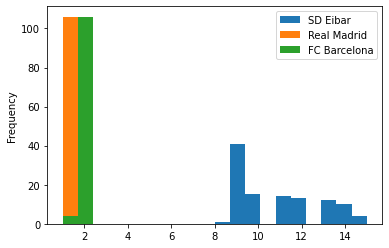

In [16]:
clasificacion_global[['SD Eibar','Real Madrid','FC Barcelona']].plot(kind='hist',bins=20)

## Reflexiones

* ¿Qué información se te ocurre que puede ser interesante incorporar en esta simulación?

    * Pues estimo que sería importante como variables que pueden decidir un partido y por consiguiente una liga:
        * Número de tiulares que no pueden jugar el partido (lesionados\sancionados\en la selección\descansando ...)
        * Si alguno de los equipos ya no se juega nada en el campeonato y el otro si.
        * Racha de partidos anteriores que puedan dar más o menos tranquilidad para jugar.
        * Climatología adversa y alguno de los dos equipos no esta familiarizado.
        * Si alguno de los equipos tiene a **Messi**.
        

* ¿Puede el método de montecarlo ayudarnos a ganar una quiniela?
    * Podría darse que se pudieran acertar una base de resultados, pero la totalidad se me antoja dificil por:
        * Gran número de variables no controlables o predecibles afectan a un partido.
        * Componente del **AZAR**. Hay factores intangibles e impredecibles en un partido que no son controlables.